In [39]:
print("In this file we are supposed to write models codes")

In this file we are supposed to write models codes


In [40]:
df=pd.read_csv("../data/synthetic_cement_thickening_dataset_10000.csv")

In [41]:
df.head()

,Pressure_psi,Depth_ft,Temperature_F,Retarder_pct,Density_ppg,ThickeningTime_hr
0,6094.11,13555.57,193.97,1.082,13.10,10.26
1,2322.93,10281.49,262.78,0.292,16.46,8.50
2,3322.16,11119.74,158.30,1.923,13.48,12.27
3,3106.23,13095.02,230.34,2.284,16.88,12.08
4,3055.44,14996.81,232.07,0.525,13.62,9.41


In [42]:
# use drop() function to separate the target value and drop the target
# column('ThickeningTime_hr') from the feature set, ensuring the model is trained only on
# independent variables while keeping the target aside for prediction
x=df.drop('ThickeningTime_hr',axis=1)
y=df['ThickeningTime_hr']

In [43]:
####Standardizaion: x-mean/std

#Standardizing is important for many machine learning algorithms that are sensitive to the scale of input features
#this method standardizes features by removing the mean and scaling to unit variance.
#this means that the transformed data will have a mean of 0 and a standard deviation of 1.

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [45]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [46]:
x_scaled.head()

,Pressure_psi,Depth_ft,Temperature_F,Retarder_pct,Density_ppg
0,0.658518,1.229267,-0.711197,-0.315304,-1.095514
1,-1.543724,0.095267,0.878686,-1.453245,0.843498
2,-0.960207,0.385600,-1.535367,0.896100,-0.876221
3,-1.086303,1.069752,0.129147,1.416096,1.085874
4,-1.115963,1.728450,0.169119,-1.117625,-0.795429


In [47]:
x_scaled.describe()

,Pressure_psi,Depth_ft,Temperature_F,Retarder_pct,Density_ppg
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,2.833289e-16,-3.113954e-16,-3.829825e-16,1.953993e-16,-1.356781e-15
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.732229e+00,-1.733958e+00,-1.726679e+00,-1.729808e+00,-1.730310e+00
25%,-8.566600e-01,-8.745677e-01,-8.697578e-01,-8.684298e-01,-8.589085e-01
50%,-2.133498e-04,1.374747e-03,-9.368086e-04,8.710294e-04,-4.819830e-03
75%,8.443584e-01,8.691709e-01,8.761443e-01,8.690915e-01,8.665814e-01
max,1.771056e+00,1.729378e+00,1.738438e+00,1.727229e+00,1.732212e+00


In [48]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [49]:
x_train.shape, x_test.shape

((8000, 5), (2000, 5))

In [50]:
# build model_1: LinearRegression

In [ ]:
# step 1: Import and Model Creation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [53]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [55]:
coefficients=model_1.coef_
intercept=model_1.intercept_
print(coefficients)
print(intercept)


[ 0.01202437 -0.00185663 -0.64705543  1.25636551 -0.52628572]
10.068450351704602


In [56]:
# prediction
y_pred_1=model_1.predict(x_test)


In [57]:
# evaluation
mse=mean_squared_error(y_test,y_pred_1)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_1)
print(f" MSE: {mse: .4f}")
print(f" RMSE: {rmse: .4f}")
print(f" R2: {r2: .4f}")

 MSE:  0.2329
 RMSE:  0.4826
 R2:  0.9101


In [58]:
# model_2 :Random Farest Regressor

In [59]:
# step 1: Import and Model Creation
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
model_2=RandomForestRegressor(n_estimators=100,random_state=42)

In [61]:
# fit the model
model_2.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [62]:
# predict on test data
y_pred_2=model_2.predict(x_test)

In [63]:
# Evaluation the Model
mse_2=mean_squared_error(y_test,y_pred_2)
rmse_2=np.sqrt(mse_2)
r2_2=r2_score(y_test,y_pred_2)


print(f" Random Farest RMSE: {rmse_2: .4f}")
print(f" Random Farest R2: {r2_2: .4f}")


 Random Farest RMSE:  0.5092
 Random Farest R2:  0.8998


In [64]:
# After evaluating both models, Linear Regression showed
# slightly better performance
# with lower RMSE and higher R2 compared to Random Farest
# therefore, we selected the Linear Regression model for 
# final analysis.
# next, we wil visualize the results with charts

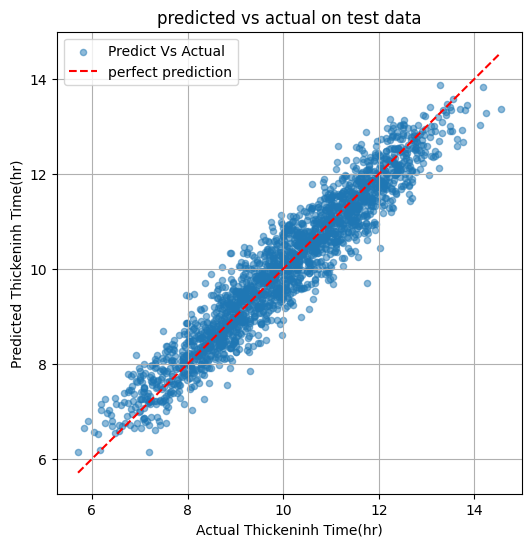

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred_1,alpha=0.5,s=20, label="Predict Vs Actual")

min_val=min(y_test.min(),y_pred_1.min())
max_val=max(y_test.max(),y_pred_1.max())

plt.plot([min_val,max_val], [min_val,max_val], 'r--',label='perfect prediction')
plt.xlabel("Actual Thickeninh Time(hr)")
plt.ylabel("Predicted Thickeninh Time(hr)")
plt.title("predicted vs actual on test data")
plt.legend()
plt.grid(True)
plt.savefig('my_plot.png',dpi=300)
plt.show()

In [68]:
# Each point represent a test sample 
# points close to the red dashed line predicted values 
# are very close to actual values

# this chart visually confirms that the model predicts 
# Thickening Time accurately